In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/jupyter/InternalVariability/src')

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [5]:
from src.post_p_large_ensemble import implement_quantile_delta_mapping, qdm_large_ensemble, MyECDF, prepare_data_numpy

In [6]:
# settings 
models_for_vars = {
    'tas': ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR','EC-Earth3'],
    'pr' : ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR'],
    'tasmax': ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR','EC-Earth3'],
}

In [7]:
regions_dict = {
    'USeast': {'lat': 41.3, 'lon': -72.5},
    'USwest':  {'lat': 37.7, 'lon': -122.4, },
    'iceland':  {'lat': 65, 'lon': -19},
    'europe':  {'lat': 51, 'lon': 10.5},
    'australia': {'lat': -25.2, 'lon': 133.7},
    'tropics': {'lat': 3.9, 'lon': -53.1}
}

In [8]:
variable = 'tasmax'

In [9]:
region = 'USeast'
USeast = MultiModelLargeEnsemble(models=models_for_vars[variable],
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmax_41.3_287.5.zarr


In [10]:
region ='USwest'
USwest = MultiModelLargeEnsemble(models= models_for_vars[variable],
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmax_37.7_237.6.zarr


In [11]:
region ='iceland'
iceland = MultiModelLargeEnsemble(models=models_for_vars[variable],
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmax_65_341.zarr


In [12]:
region ='europe'
europe = MultiModelLargeEnsemble(models=models_for_vars[variable],
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmax_51_10.5.zarr


In [13]:
region ='australia'
australia = MultiModelLargeEnsemble(models=models_for_vars[variable],
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmax_-25.2_133

In [14]:
region ='tropics'
tropics = MultiModelLargeEnsemble(models=models_for_vars[variable],
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmax_3.9_306.9.zarr


In [15]:
def quantile_occurance(parameter,region,args):
    values = args[parameter]
    datasets = []
    for i in values:
        args[parameter] = i
        _, internal = region.quantile_occurance(**args)
        internal = internal.resample(time='AS').mean().rolling(
            time=10, center=True).mean()
        datasets.append(internal)
    dataset = xr.concat(datasets, dim=values)
    dataset['MTratio'] = dataset.mean('member')
        
    return dataset

In [16]:
def sensitivity_test(parameter,region,args):
    values = args[parameter]
    datasets = []
    for i in values:
        args[parameter] = i
        internal = region.extreme_internal_variability(**args)
        datasets.append(internal)
    dataset = xr.concat(datasets, dim=values)
    dataset['MTratio'] = dataset.model_le/dataset.total_le
        
    return dataset

In [17]:
from copy import deepcopy
def sensitivity_allregions(parameter, args, regions):
    dss = []
    for r in regions:
        tmp_args = deepcopy(args)
        ds = sensitivity_test(parameter=parameter,region=r,args=tmp_args)
        ds = ds.expand_dims('region')
        dss.append(ds)
    regions_str = ['USwest','europe','australia','tropics']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions_str})
    
    return final_dataset

In [18]:
def extreme_internal_allregions(args, regions):
    dss = []
    for r in regions:
        internal = r.extreme_internal_variability(**args)
        internal = internal.expand_dims('region')
        dss.append(internal)
    regions_str = ['USwest','europe','australia','tropics']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions_str})
    return final_dataset

In [19]:
test_histslice_false = sensitivity_allregions(parameter='hist_slice',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1920','1940'),slice('1960','1980'),
                                                              slice('1995','2014'),
                                                              slice(None, None)],
                                               'postprocess':False},
                                        regions = [USwest,europe,australia,tropics]
                                       )

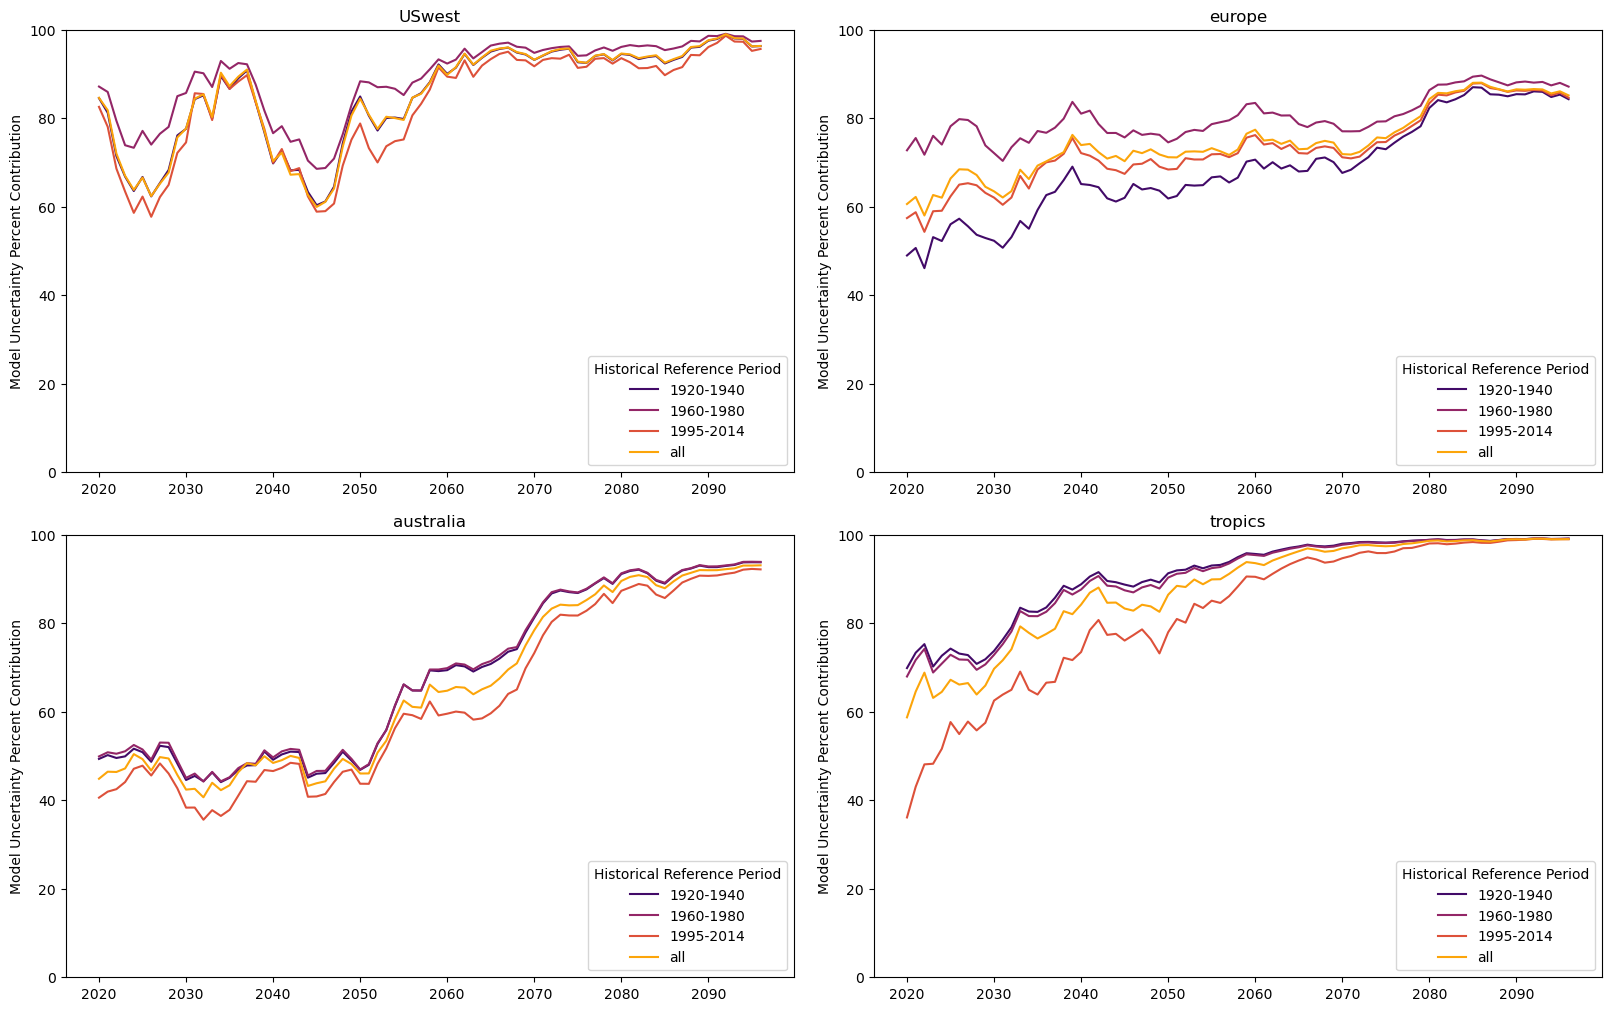

In [20]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
colors = sns.color_palette("inferno", len(test_histslice_false.concat_dim))
labels = ['1920-1940','1960-1980','1995-2014','all']

regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i in range(len(test_histslice_false.concat_dim)):
        axe.plot(test_histslice_false.sel(region=r).isel(concat_dim=i).time,test_histslice_false.sel(region=r).isel(concat_dim=i).model_le_frac,
                c=colors[i])
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        axe.legend(labels=labels,loc=4,title='Historical Reference Period')

In [21]:
test_histslice_true = sensitivity_allregions(parameter='hist_slice',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1920','1940'),slice('1960','1980'),
                                                              slice('1995','2014'),
                                                              slice(None, None)],
                                               'postprocess':True},
                                        regions = [USwest,europe,australia,tropics]
                                       )

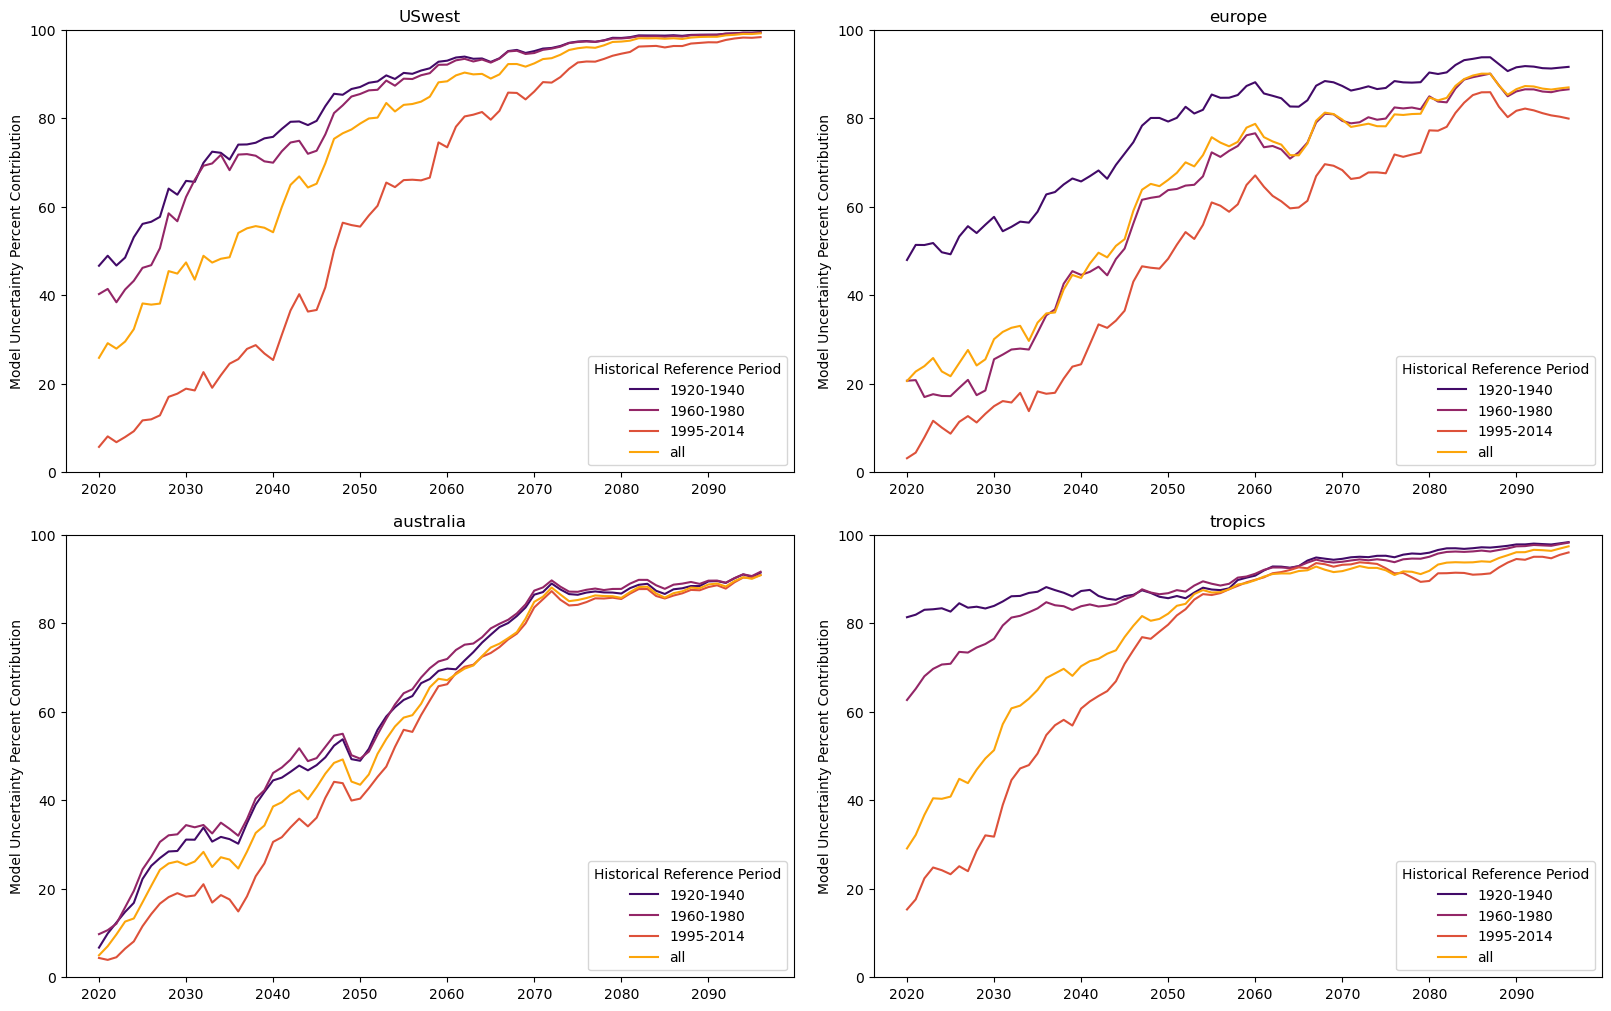

In [22]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
colors = sns.color_palette("inferno", len(test_histslice_true.concat_dim))

regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i in range(len(test_histslice_true.concat_dim)):
        axe.plot(test_histslice_true.sel(region=r).isel(concat_dim=i).time,test_histslice_true.sel(region=r).isel(concat_dim=i).model_le_frac,
                c=colors[i])
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        labels = ['1920-1940','1960-1980','1995-2014','all']
        axe.legend(labels=labels,loc=4,title='Historical Reference Period')

In [23]:
region = 'USeast'
USeast_qdm = MultiModelLargeEnsemble(models=models_for_vars[variable],
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability/era_files', name = region,
                                 load=True)

In [24]:
region = 'USwest'
USwest_qdm = MultiModelLargeEnsemble(models=models_for_vars[variable],
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability/era_files', name = region,
                                 load=True)

In [25]:
region = 'iceland'
iceland_qdm = MultiModelLargeEnsemble(models=models_for_vars[variable],
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability/era_files', name = region,
                                 load=True)

In [26]:
region = 'europe'
europe_qdm = MultiModelLargeEnsemble(models=models_for_vars[variable],
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability/era_files', name = region,
                                 load=True)

In [27]:
region = 'australia'
australia_qdm = MultiModelLargeEnsemble(models=models_for_vars[variable],
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability/era_files', name = region,
                                 load=True)

In [28]:
region = 'tropics'
tropics_qdm = MultiModelLargeEnsemble(models=models_for_vars[variable],
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability/era_files', name = region,
                                 load=True)

In [29]:
test_histslice_qdm = sensitivity_allregions(parameter='hist_slice',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'hist_slice':[slice('1920','1940'),slice('1960','1980'),
                                                              slice('1995','2014'),
                                                              slice(None, None)],
                                               'postprocess':False},
                                        regions = [USwest_qdm,europe_qdm,australia_qdm,tropics_qdm]
                                       )

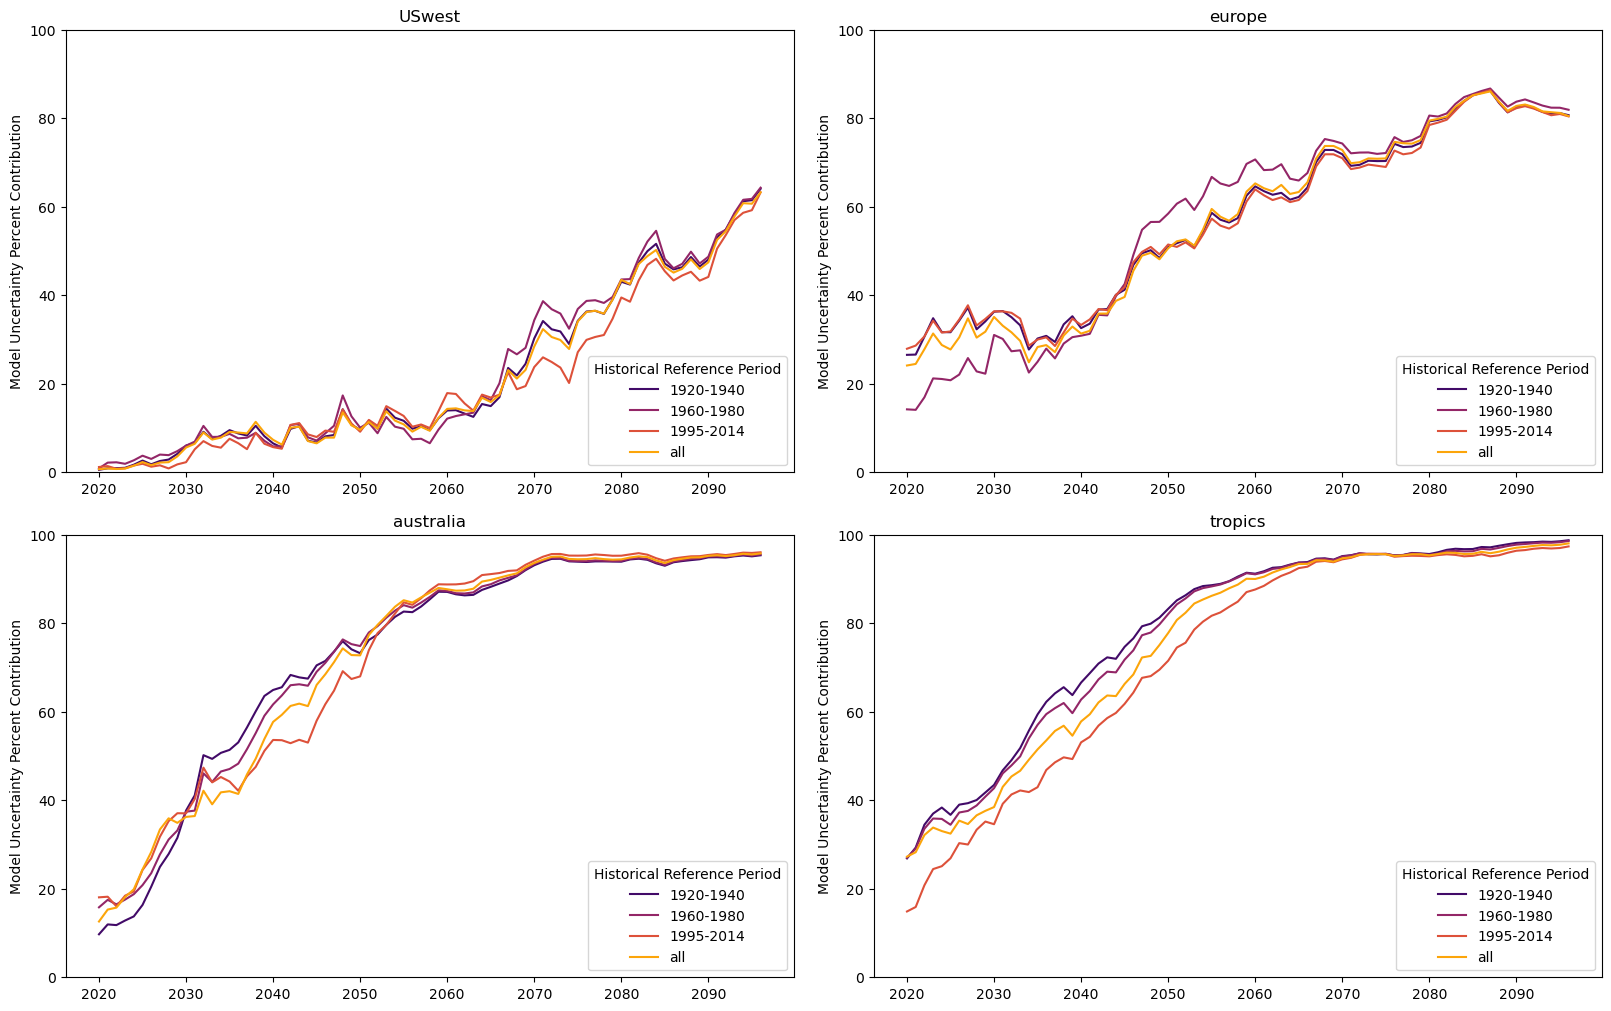

In [31]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
colors = sns.color_palette("inferno", len(test_histslice_qdm.concat_dim))

regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i in range(len(test_histslice_qdm.concat_dim)):
        axe.plot(test_histslice_qdm.sel(region=r).isel(concat_dim=i).time,test_histslice_qdm.sel(region=r).isel(concat_dim=i).model_le_frac,
                c=colors[i])
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        labels = ['1920-1940','1960-1980','1995-2014','all']
        axe.legend(labels=labels,loc=4,title='Historical Reference Period')

In [32]:
test_histslice_qdm_true = sensitivity_allregions(parameter='hist_slice',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'hist_slice':[slice('1920','1940'),slice('1960','1980'),
                                                              slice('1995','2014'),
                                                              slice(None, None)],
                                               'postprocess':True},
                                        regions = [USwest_qdm,europe_qdm,australia_qdm,tropics_qdm]
                                       )

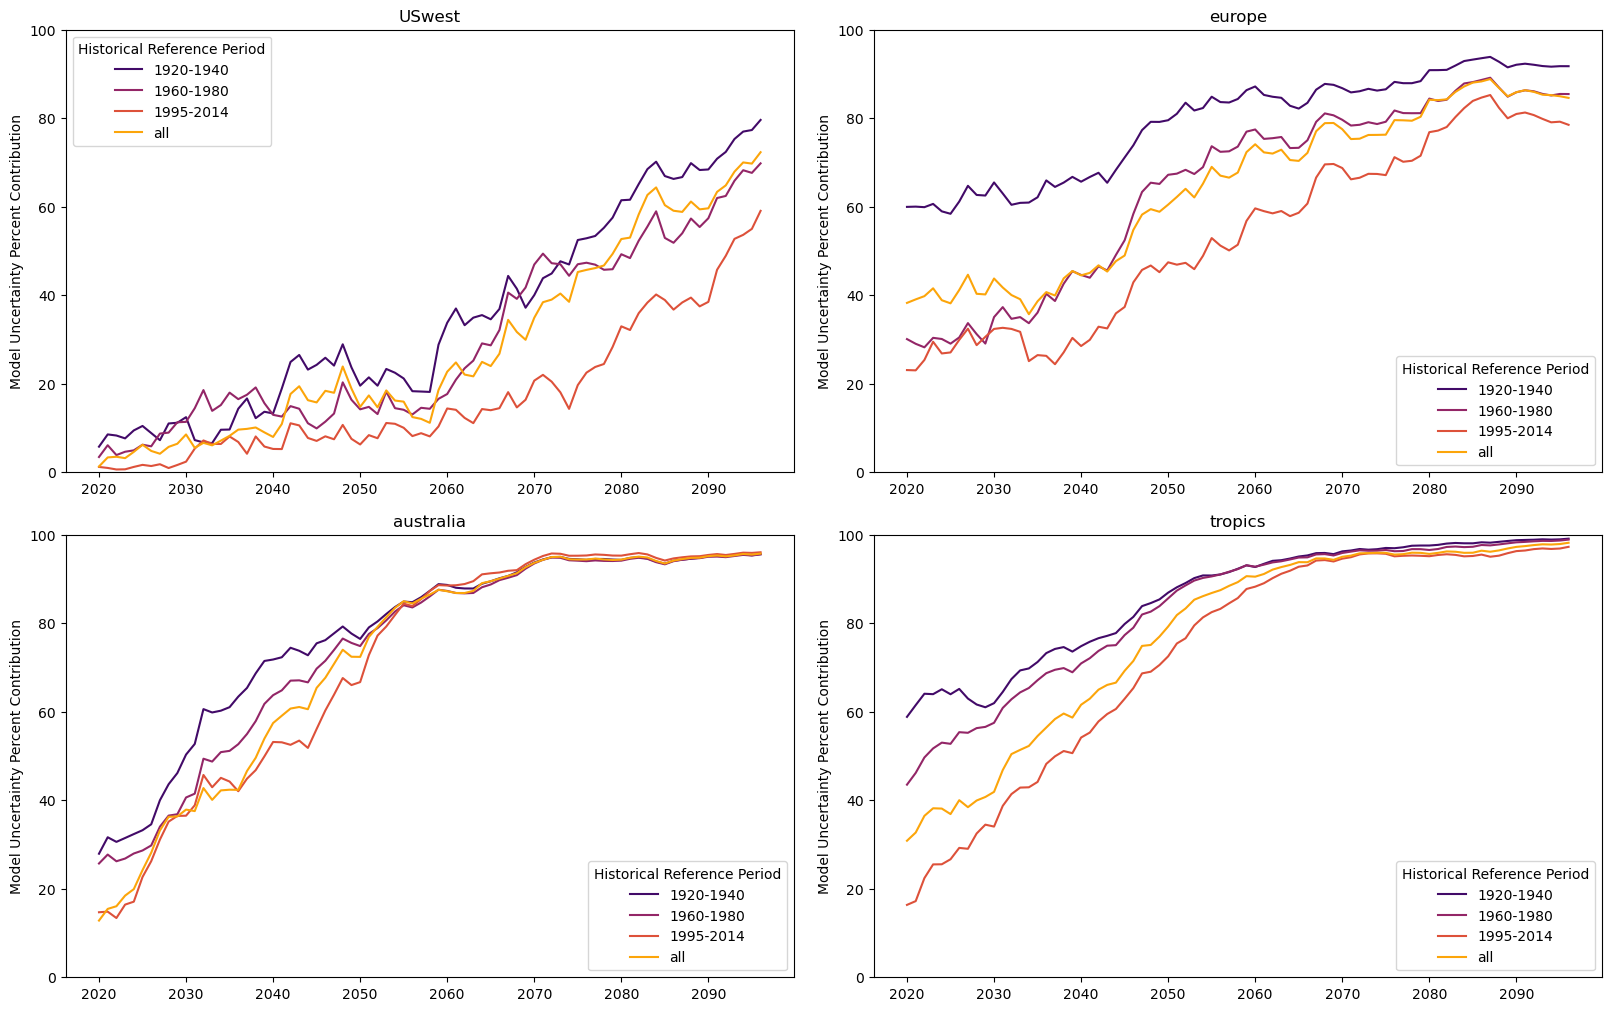

In [33]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
colors = sns.color_palette("inferno", len(test_histslice_qdm_true.concat_dim))

regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i in range(len(test_histslice_qdm_true.concat_dim)):
        axe.plot(test_histslice_qdm_true.sel(region=r).isel(concat_dim=i).time,test_histslice_qdm_true.sel(region=r).isel(concat_dim=i).model_le_frac,
                c=colors[i])
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        labels = ['1920-1940','1960-1980','1995-2014','all']
    if r == 'USwest':
        axe.legend(labels=labels,loc=2,title='Historical Reference Period')
    else:
        axe.legend(labels=labels,loc=4,title='Historical Reference Period')



In [34]:
internal_qdm_False = extreme_internal_allregions(args = {'return_period':10,
                                    'coarsen':1,
                                    'conseq_days':1,
                                    'rolling_average':10,
                                    'hist_slice':slice('1995','2014'),
                                    'postprocess':False,
                                    },
                                    regions = [USwest_qdm,europe_qdm,australia_qdm,tropics_qdm]

                           )

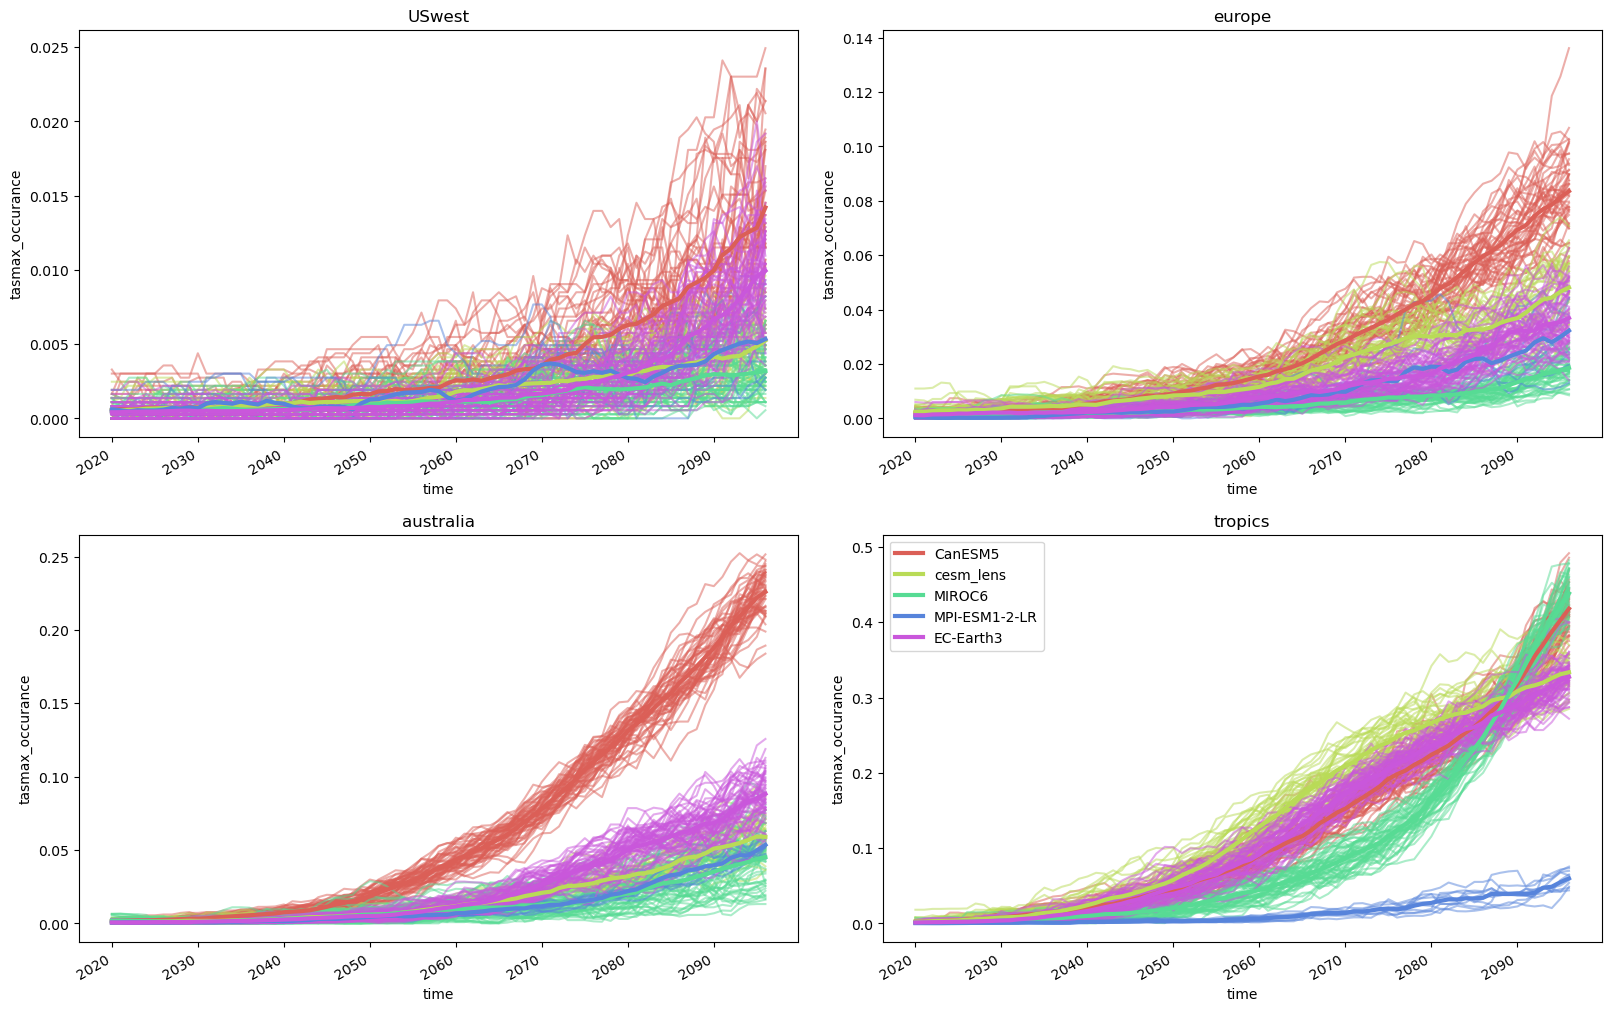

In [41]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("hls", len(internal_qdm_False[variable+'_occurance'].model))

axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
# regions = [USeast,USwest,iceland,europe,australia,tropics]
regions = ['USwest','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_qdm_False[variable+'_occurance'].model):
        m = internal_qdm_False.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
        # axe.set_yscale('log')
        # axe.set_ylim(10**(-4),10**0)
plt.legend()

In [ ]:
internal_qdm_True = extreme_internal_allregions(args = {'return_period':10,
                                    'coarsen':1,
                                    'conseq_days':1,
                                    'rolling_average':10,
                                    'hist_slice':slice('1995','2014'),
                                    'postprocess':True,
                                    },
                                    regions = [USwest_qdm,europe_qdm,australia_qdm,tropics_qdm]

                           )

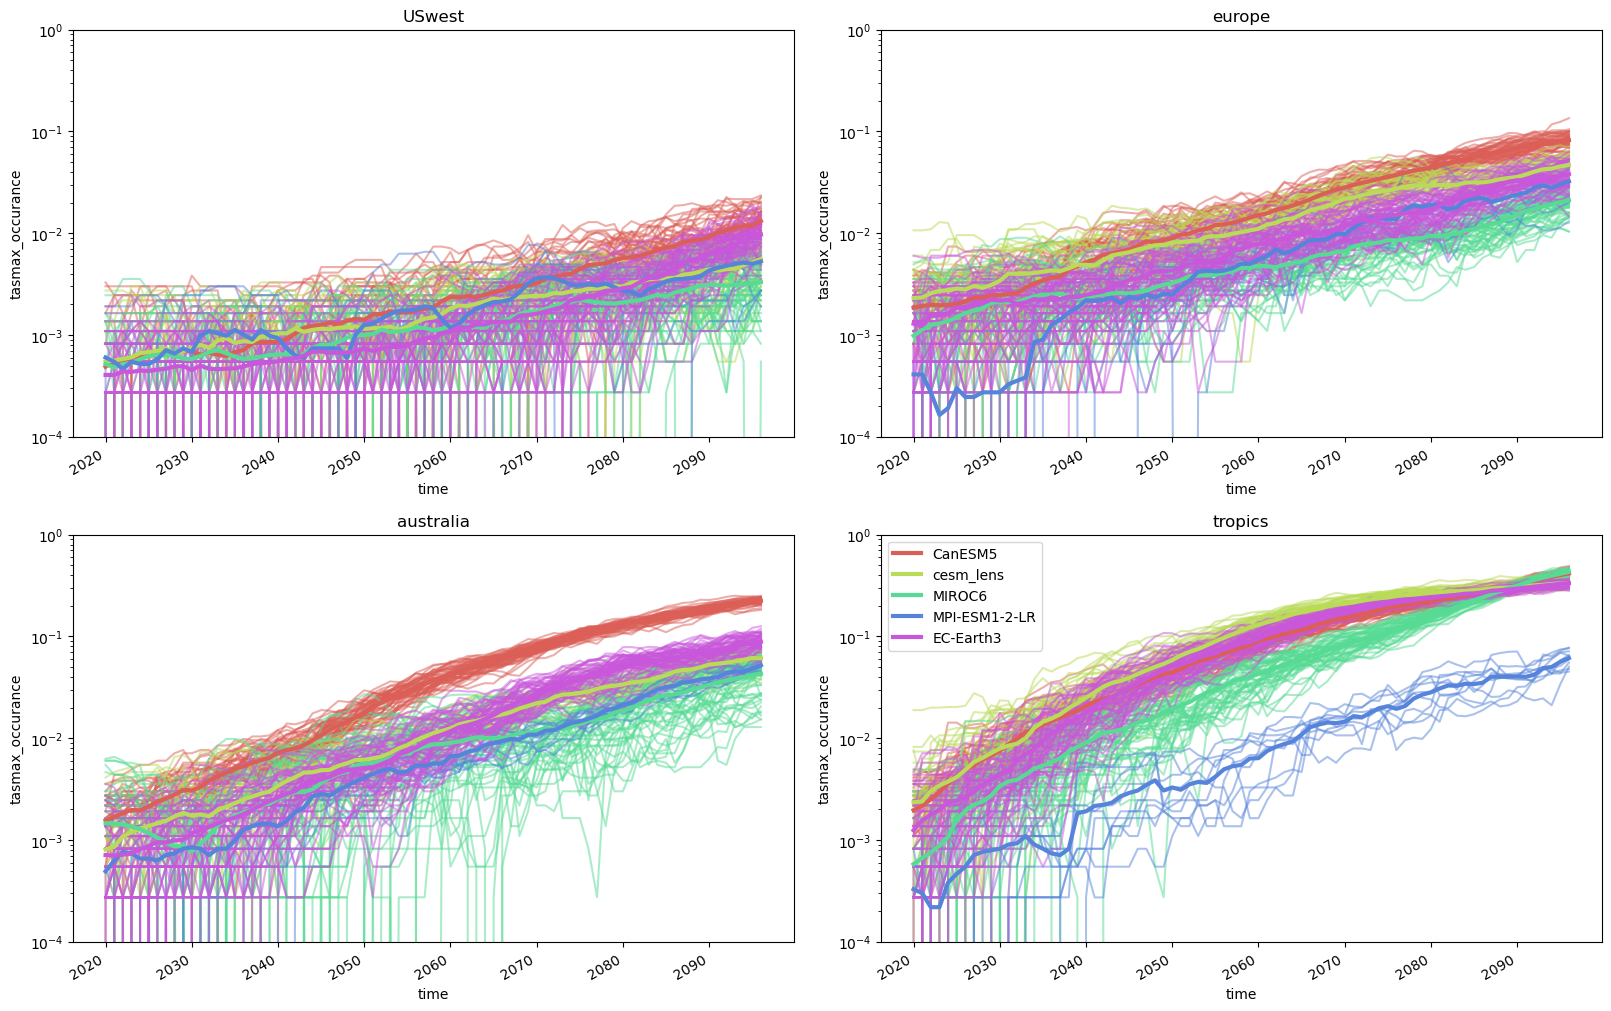

In [32]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("hls", len(internal_qdm_True[variable+'_occurance'].model))

axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
# regions = [USeast,USwest,iceland,europe,australia,tropics]
regions = ['USwest','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_qdm_True[variable+'_occurance'].model):
        m = internal_qdm_True.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
        axe.set_yscale('log')
        axe.set_ylim(10**(-4),10**0)
plt.legend()

In [36]:
internal_true = extreme_internal_allregions(args = {'return_period':10,
                                    'coarsen':1,
                                    'conseq_days':1,
                                    'rolling_average':10,
                                    'hist_slice':slice('1995','2014'),
                                    'postprocess':True,
                                    },
                                    regions = [USwest,europe,australia,tropics]
                           )

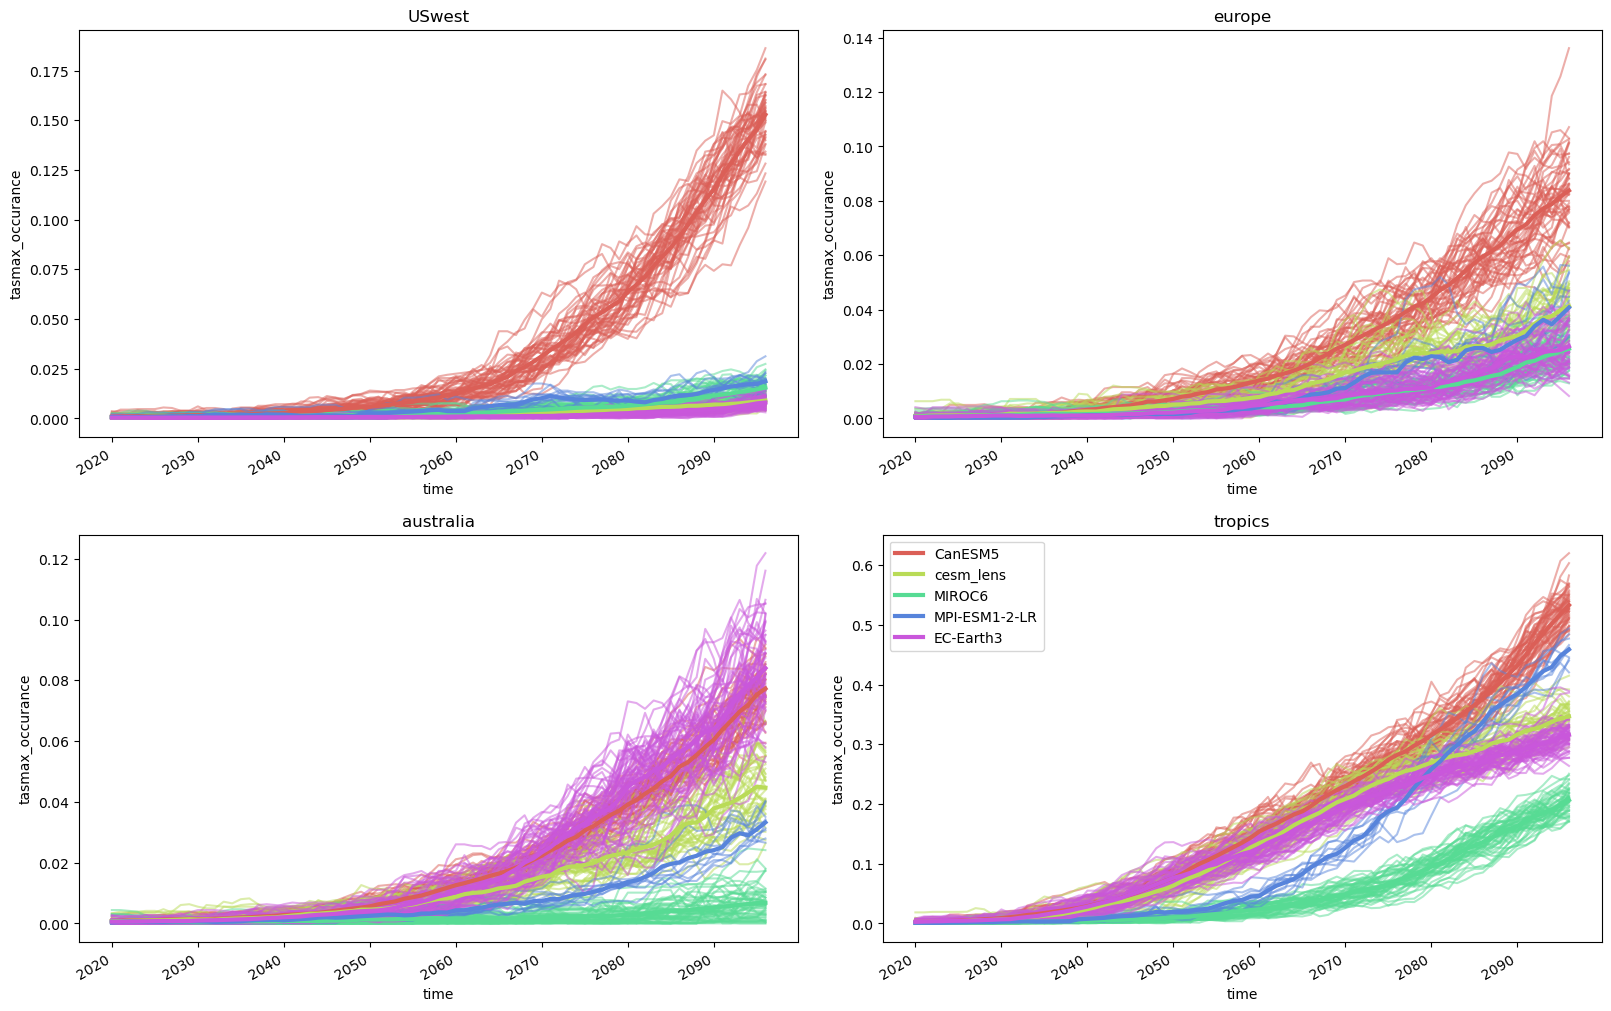

In [37]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("hls", len(internal_true[variable+'_occurance'].model))

axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
# regions = [USeast,USwest,iceland,europe,australia,tropics]
regions = ['USwest','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_true[variable+'_occurance'].model):
        m = internal_true.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
plt.legend()

In [ ]:
internal_false = extreme_internal_allregions(args = {'return_period':10,
                                    'coarsen':1,
                                    'conseq_days':1,
                                    'rolling_average':10,
                                    'hist_slice':slice('1995','2014'),
                                    'postprocess':False,
                                    },
                                    regions = [USwest,europe,australia,tropics]
                           )

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("hls", len(internal_false[variable+'_occurance'].model))

axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
# regions = [USeast,USwest,iceland,europe,australia,tropics]
regions = ['USwest','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_false[variable+'_occurance'].model):
        m = internal_false.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
plt.legend()

In [105]:
region = 'australia'
path = f'gcs://climateai_data_repository/tmp/internal_variability/era_files/{region}/reanalysis_daily.zarr'
reanalysis_daily = xr.open_zarr(path, consolidated=True).load()

q =0.9
slice_y = slice('1979', '2014')

print(f'{region}, quantile = {q}')
print(f"QDM quantile (no post-p) = {australia_qdm.hist.tasmax.sel(time=slice_y).quantile(q, ('member', 'time', 'model')).values}")
print(f"QDM quantile (post-p) = {australia_qdm.hist.tasmax.sel(time=slice_y).quantile(q, ('member', 'time')).values}")
print(f"Raw quantile (no post-p) = {australia.hist.tasmax.sel(time=slice_y).quantile(q, ('member', 'time', 'model')).values}")
print(f"Raw quantile (post-p) = {australia.hist.tasmax.sel(time=slice_y).quantile(q, ('member', 'time')).values}")
print(f"Reanalysis quantile = {reanalysis_daily.t2m_max.sel(time=slice_y).quantile(q, ('time')).values}")

australia, quantile = 0.9
QDM quantile (no post-p) = 38.87625752214808
QDM quantile (post-p) = [38.87054632 38.87148087 38.87065771 38.8942912  38.88990656]
Raw quantile (no post-p) = 42.13615722656252
Raw quantile (post-p) = [45.36954041 36.72333069 45.60980835 39.01841431 39.79507446]
Reanalysis quantile = 38.8554443359375


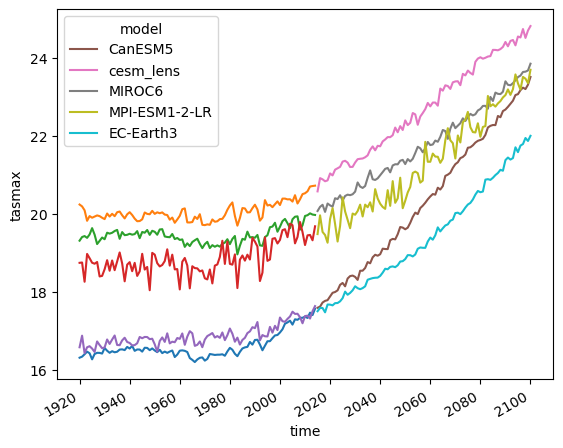

In [38]:
USwest.hist.tasmax.mean('member').resample(time='AS').mean().plot(hue='model')
USwest.future.tasmax.mean('member').resample(time='AS').mean().plot(hue='model')

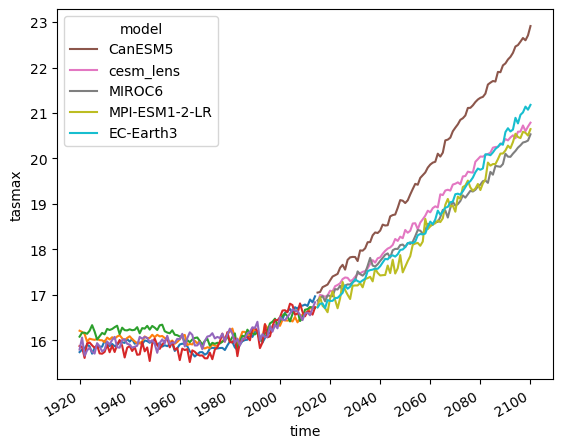

In [39]:
USwest_qdm.hist.tasmax.mean('member').resample(time='AS').mean().plot(hue='model')
USwest_qdm.future.tasmax.mean('member').resample(time='AS').mean().plot(hue='model')